In [68]:
# Assurez-vous que les bibliothèques nécessaires sont installées
#!pip install pandas numpy matplotlib


In [69]:
# general importation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings as wr
wr.filterwarnings(action="ignore")
import seaborn as sns
from sklearn.model_selection import train_test_split


<div style="background-color: #3498db; border-radius: 10px; text-align: center; padding: 10px;">
    <h1>Data Loading</h1>
</div>


In [70]:
# Transaction Records
transaction_records = pd.read_csv('Folder1/transaction_records.csv')

# Transaction Metadata
transaction_metadata = pd.read_csv('Folder1/transaction_metadata.csv')

# Customer Data
customer_data = pd.read_csv('Folder2/customer_data.csv')

# Account Activit
account_activity = pd.read_csv('Folder2/account_activity.csv')

# Suspicious Activity
suspicious_activity = pd.read_csv('Folder3/suspicious_activity.csv')

# Amount Data
amount_data = pd.read_csv('Folder4/amount_data.csv')

# Anomaly Scores
anomaly_scores = pd.read_csv('Folder4/anomaly_scores.csv')

# Merchant Data
merchant_data = pd.read_csv('Folder5/merchant_data.csv')

# Transaction Category Labels
transaction_category_labels = pd.read_csv('Folder5/transaction_category_labels.csv')


let print the head of the datasets:

In [71]:
# Display the first lines of each dataset for review

print("Transaction Records:")
print(transaction_records.head())

print("\nTransaction Metadata:")
print(transaction_metadata.head())

print("\nCustomer Data:")
print(customer_data.head())

print("\nAccount Activity:")
print(account_activity.head())

print("\nSuspicious Activity:")
print(suspicious_activity.head())

print("\nAmount Data:")
print(amount_data.head())

print("\nAnomaly Scores:")
print(anomaly_scores.head())

print("\nMerchant data_cleaned_cleaned:")
print(merchant_data.head())

print("\nTransaction Category Labels:")
print(transaction_category_labels.head())


Transaction Records:
   TransactionID     Amount  CustomerID
0            1.0  24.186595      5124.0
1            2.0  27.045031         NaN
2            3.0  63.878814      6215.0
3            4.0  26.218540         NaN
4            5.0  55.967586      5538.0

Transaction Metadata:
   TransactionID            Timestamp  MerchantID
0            1.0  2022-01-01 00:00:00      2559.0
1            2.0  2022-01-01 01:00:00         NaN
2            3.0  2022-01-01 02:00:00      8014.0
3            4.0  2022-01-01 03:00:00      3626.0
4            5.0  2022-01-01 04:00:00         NaN

Customer Data:
   CustomerID           Name   Age       Address
0      1001.0  Customer 1001  59.0  Address 1001
1      1002.0            NaN  33.0  Address 1002
2      1003.0  Customer 1003   NaN  Address 1003
3      1004.0  Customer 1004  29.0  Address 1004
4      1005.0            NaN  64.0  Address 1005

Account Activity:
   CustomerID  AccountBalance   LastLogin
0        1001     4848.556994  2022-01-01
1  

In [72]:
# fusion of transaction data
transaction_data = pd.merge(transaction_records,amount_data, on="TransactionID")
transaction_data = pd.merge(transaction_data, transaction_metadata, on="TransactionID")
transaction_data = pd.merge(transaction_data, anomaly_scores, on="TransactionID")
transaction_data = pd.merge(transaction_data, transaction_category_labels, on="TransactionID")

# fusion of customer data
customer_data = pd.merge(customer_data, account_activity, on="CustomerID")
customer_data = pd.merge(customer_data, suspicious_activity, on="CustomerID")

# final fusion between transaction data and customer data
data = pd.merge(transaction_data, customer_data, on="CustomerID")

# lets print the first lines of the combined data
print("Combined Data:")
print(data.head())
print("\nTransaction Data:")
print(transaction_data.head())
print("\nCustomer Data:")
print(customer_data.head())


In [ ]:
data.head()

,TransactionID,Amount,CustomerID,TransactionAmount,Timestamp,MerchantID,AnomalyScore,Category,Name,Age,Address,AccountBalance,LastLogin,SuspiciousFlag
0,1.0,24.186595,5124.0,90.269008,2022-01-01 00:00:00,2559.0,0.179908,Retail,Customer 5124,NaN,Address 5124,6169.910841,2033-04-16,0
1,5170.0,25.822972,5124.0,68.711374,2022-08-04 09:00:00,4794.0,0.496737,Other,Customer 5124,NaN,Address 5124,6169.910841,2033-04-16,0
2,3.0,63.878814,6215.0,90.854925,2022-01-01 02:00:00,8014.0,0.003338,Retail,Customer 6215,18.0,Address 6215,2901.465710,2036-04-11,0
3,4470.0,83.802112,6215.0,48.688829,NaN,4540.0,0.114749,Other,Customer 6215,18.0,Address 6215,2901.465710,2036-04-11,0
4,5.0,55.967586,5538.0,50.184070,2022-01-01 04:00:00,NaN,0.967909,Food,Customer 5538,33.0,Address 5538,1929.259245,2034-06-04,0


<div style="background-color: #bde0fe; border-radius: 10px; text-align: center; padding: 20px;">
    <h1 style="color: black;">Data Exploration</h1>
</div>


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6003 entries, 0 to 6002
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TransactionID      6003 non-null   float64
 1   Amount             5706 non-null   float64
 2   CustomerID         6003 non-null   float64
 3   TransactionAmount  5718 non-null   float64
 4   Timestamp          5709 non-null   object 
 5   MerchantID         5708 non-null   float64
 6   AnomalyScore       6003 non-null   float64
 7   Category           6003 non-null   object 
 8   Name               5405 non-null   object 
 9   Age                5403 non-null   float64
 10  Address            5447 non-null   object 
 11  AccountBalance     6003 non-null   float64
 12  LastLogin          6003 non-null   object 
 13  SuspiciousFlag     6003 non-null   int64  
dtypes: float64(8), int64(1), object(5)
memory usage: 656.7+ KB


In [ ]:
data.shape

(6003, 14)

In [ ]:
data.describe()

,TransactionID,Amount,CustomerID,TransactionAmount,MerchantID,AnomalyScore,Age,AccountBalance,SuspiciousFlag
count,6003.000000,5706.000000,6003.000000,5718.000000,5708.000000,6003.000000,5403.000000,6003.000000,6003.000000
mean,3991.270865,75.365703,5031.468932,69.233310,5955.858094,0.505344,40.964834,6343.373198,0.021323
std,2302.430245,200.126696,2320.796899,148.416342,2310.202844,0.286907,13.414899,6603.555982,0.144470
min,1.000000,10.016432,1001.000000,10.020273,2001.000000,0.000225,18.000000,1002.803355,0.000000
25%,1993.500000,32.046888,3057.000000,31.406476,3939.750000,0.257466,30.000000,3391.708180,0.000000
50%,3984.000000,55.442434,5045.000000,54.665452,5905.500000,0.508957,41.000000,5586.846084,0.000000
75%,5980.500000,78.720782,7018.500000,78.023172,7983.000000,0.754177,53.000000,7812.578773,0.000000
max,8000.000000,1999.993695,9000.000000,1499.958966,9999.000000,0.999831,64.000000,49994.599823,1.000000


In [ ]:
data.columns

Index(['TransactionID', 'Amount', 'CustomerID', 'TransactionAmount',
       'Timestamp', 'MerchantID', 'AnomalyScore', 'Category', 'Name', 'Age',
       'Address', 'AccountBalance', 'LastLogin', 'SuspiciousFlag'],
      dtype='object')

In [ ]:
numerical_features = data.select_dtypes(include=['number']).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()
print(numerical_features)
print(categorical_features)

['TransactionID', 'Amount', 'CustomerID', 'TransactionAmount', 'MerchantID', 'AnomalyScore', 'Age', 'AccountBalance', 'SuspiciousFlag']
['Timestamp', 'Category', 'Name', 'Address', 'LastLogin']


<div style="background-color: #cdb4db; border-radius: 10px; text-align: center; padding: 20px;">
    <h1 style="color: black;">Data Visualization</h1>
</div>


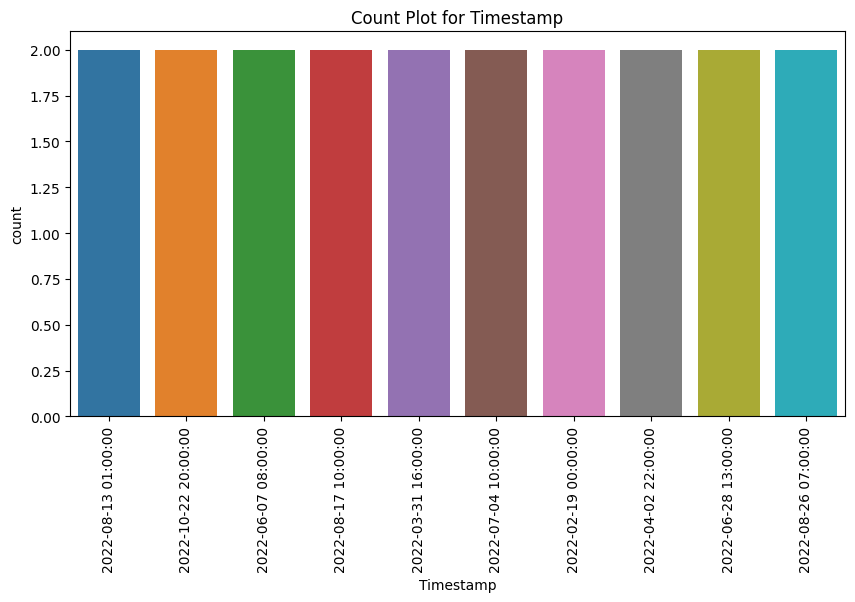

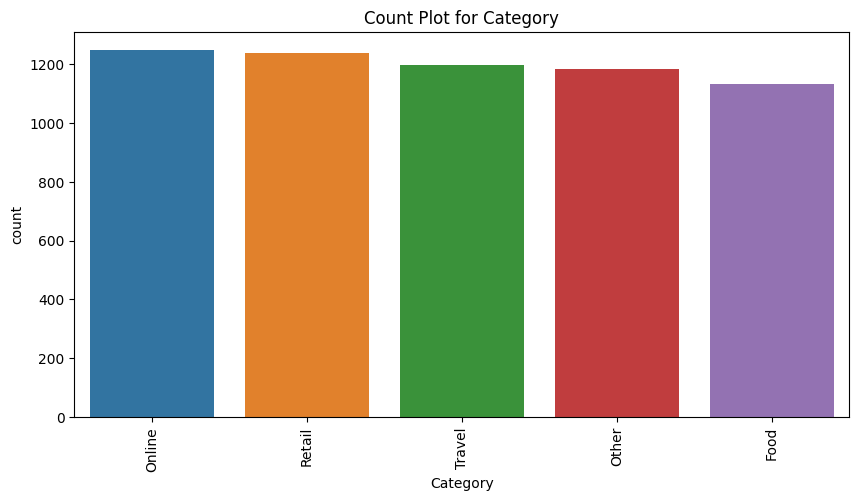

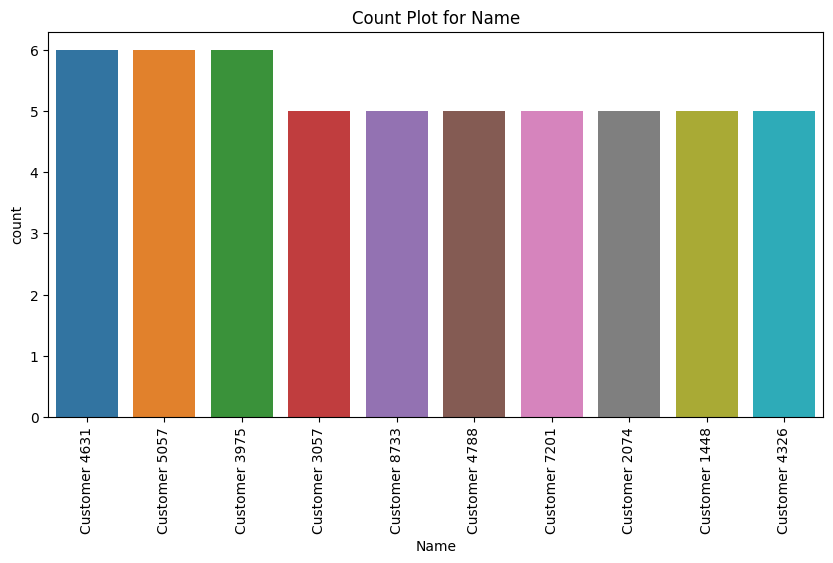

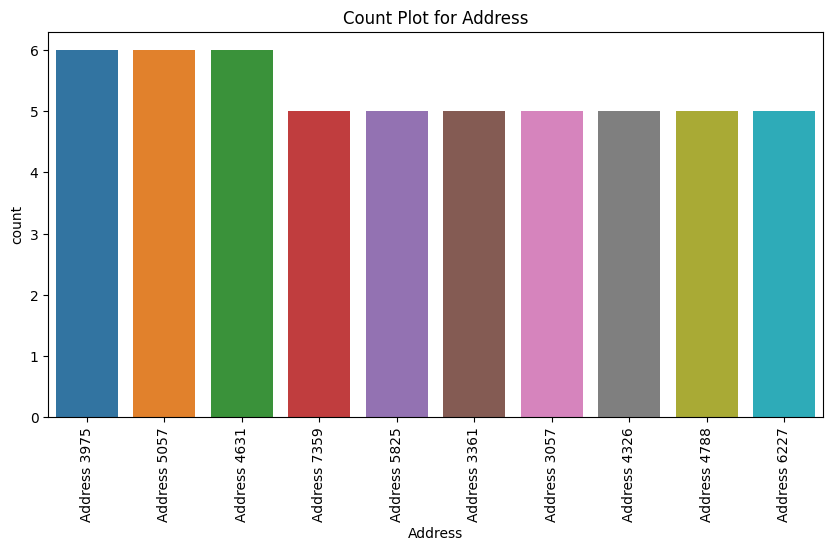

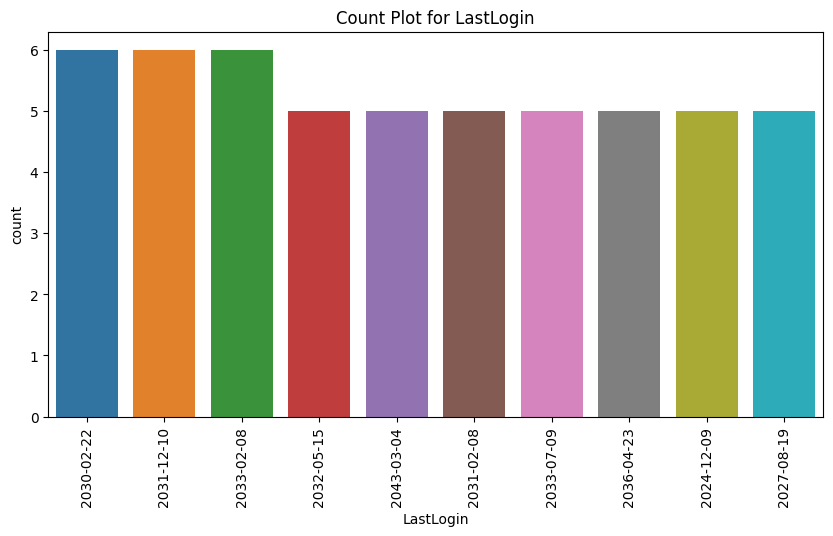

In [ ]:
# lets plot somme graphs to see the distribution of the data

for column in data.columns:
    if data[column].dtype == 'object':  # Check if the column has a categorical data type
        top_10_values = data[column].value_counts().head(10)  # Get the first 10 unique values and their counts
        plt.figure(figsize=(10, 5))  # Adjust the figure size if needed
        sns.countplot(x=column, data=data, order=top_10_values.index)
        plt.title(f'Count Plot for {column}')
        plt.xticks(rotation=90)  # Rotate x-axis labels if they are long
        plt.show()


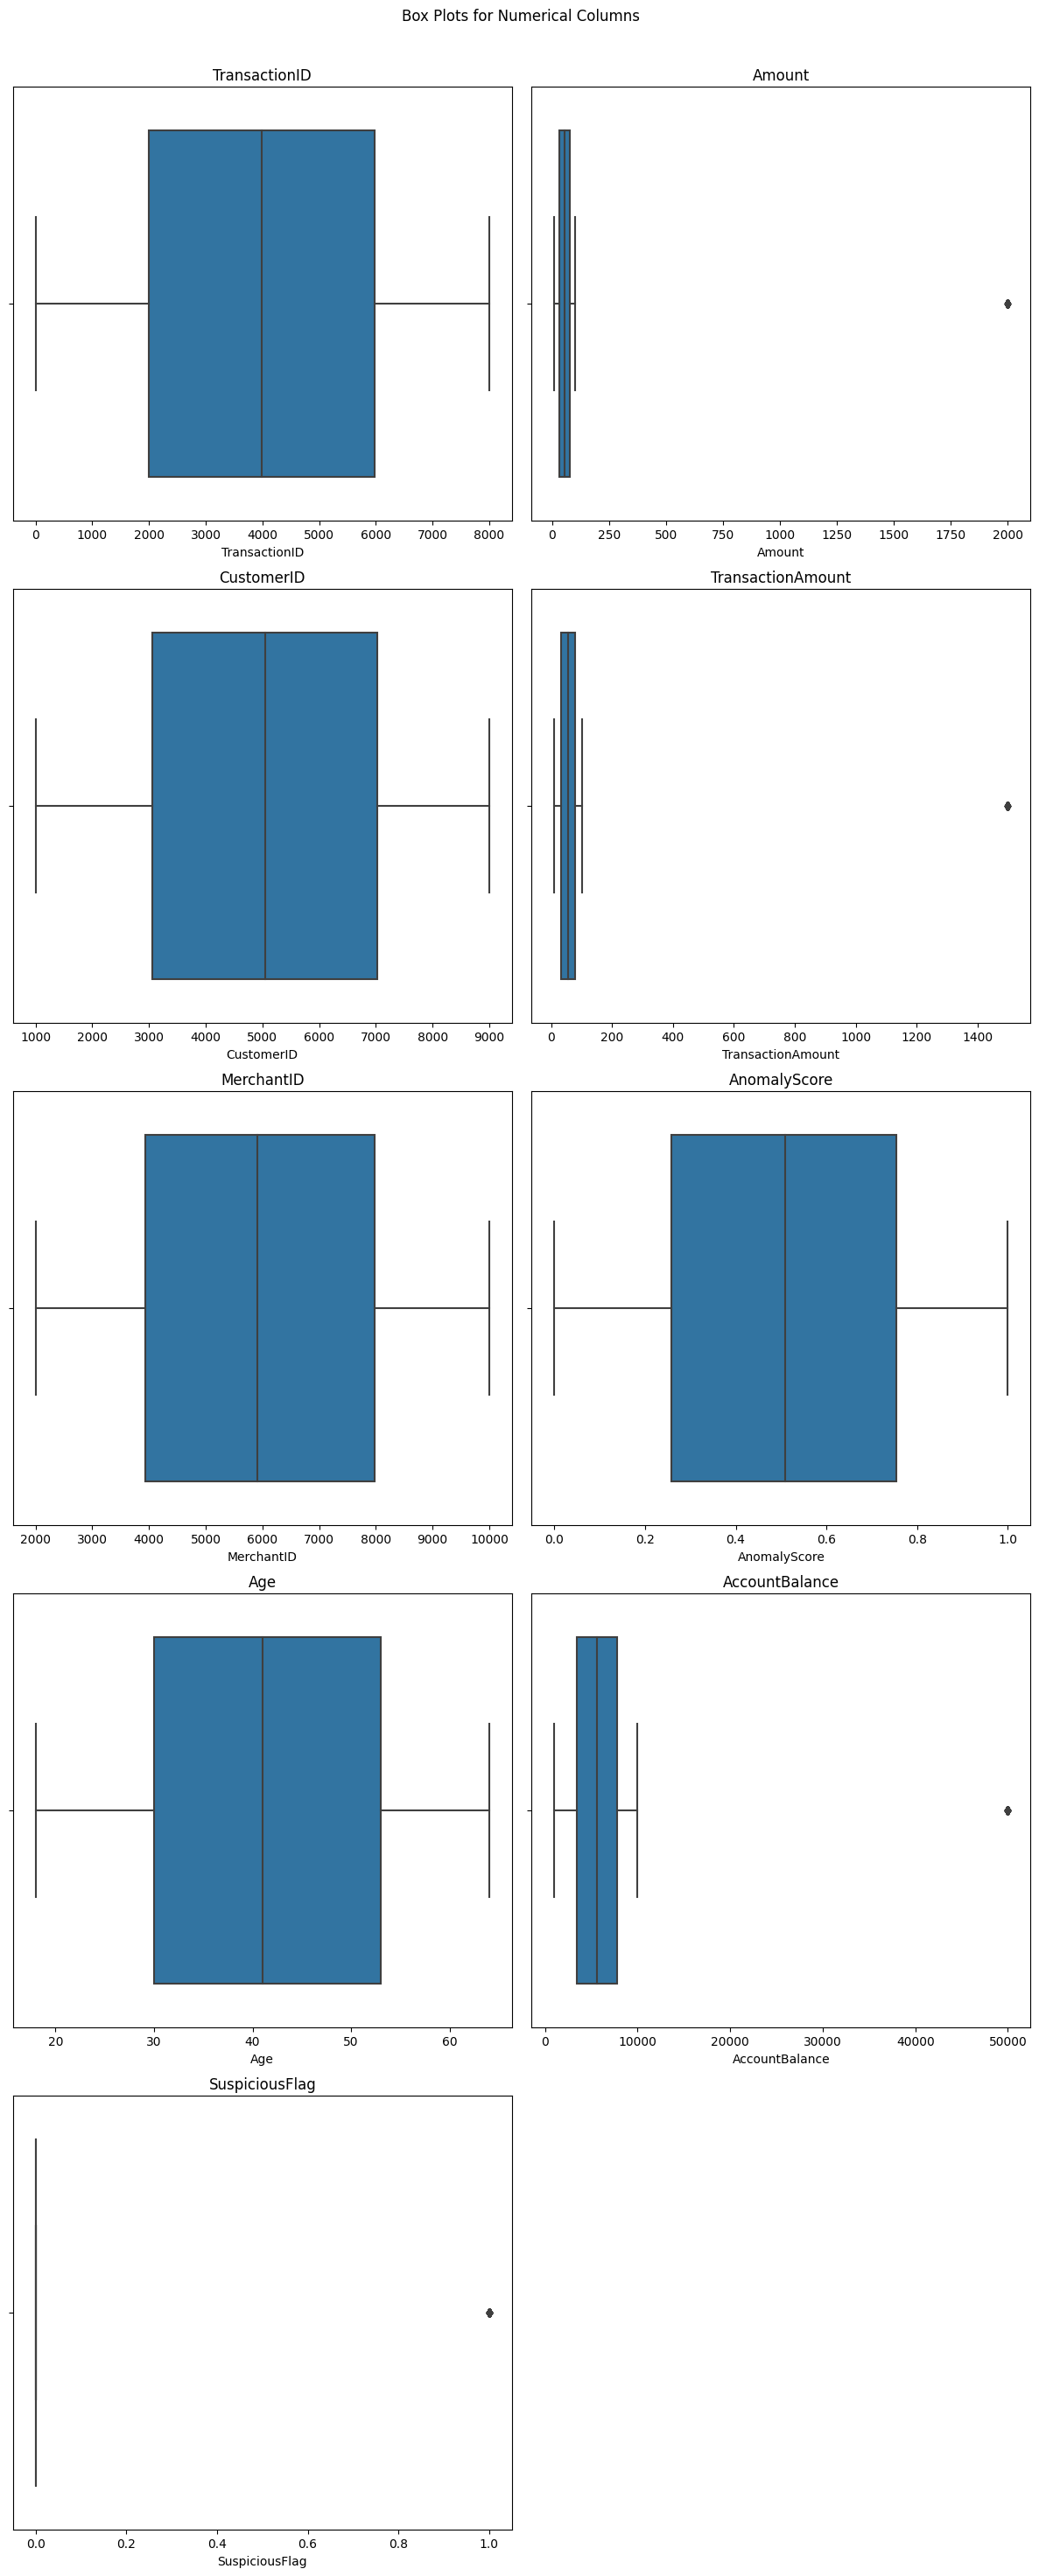

In [ ]:
# lets plot the distribution of the numerical data

# Get the number of numerical columns
num_cols = len(data.select_dtypes(include=['number']).columns)

# Calculate the number of rows and columns for subplots
num_rows = (num_cols // 2) + (num_cols % 2)

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6*num_rows))
fig.suptitle("Box Plots for Numerical Columns")

# Loop through the numerical columns and create box plots
for i, column in enumerate(data.select_dtypes(include=['number']).columns):
    row = i // 2
    col = i % 2
    sns.boxplot(x=data[column], ax=axes[row, col])
    axes[row, col].set_title(column)

# Remove any empty subplots
if num_cols % 2 != 0:
    fig.delaxes(axes[num_rows-1, 1])

plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust the position of the overall title
plt.show()


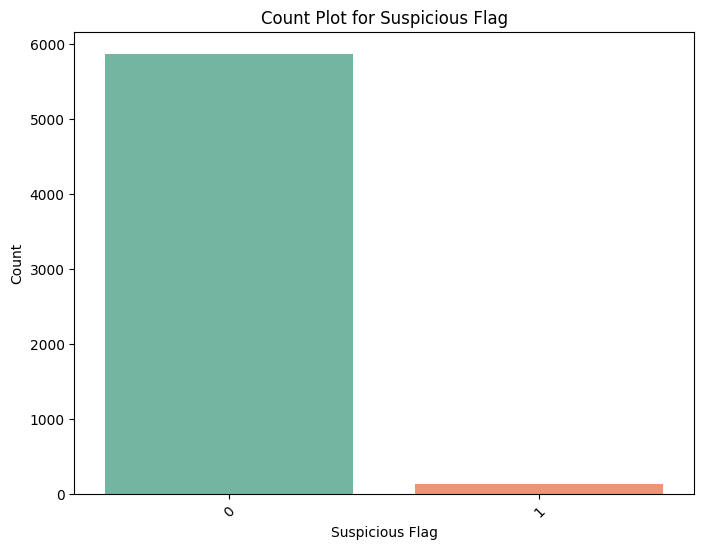

In [ ]:
# lets plot the distribution of the discrete data 

# We should use countplot for SuspiciousFlag feature

plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
sns.countplot(x='SuspiciousFlag', data=data, palette='Set2')  # You can change the palette as desired
plt.title('Count Plot for Suspicious Flag')
plt.xlabel('Suspicious Flag')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if they are long

plt.show()

### Okay we can see the dataset's target feature is heavily imbalanced sowe can use further techiniqes to equalize the feature's values 

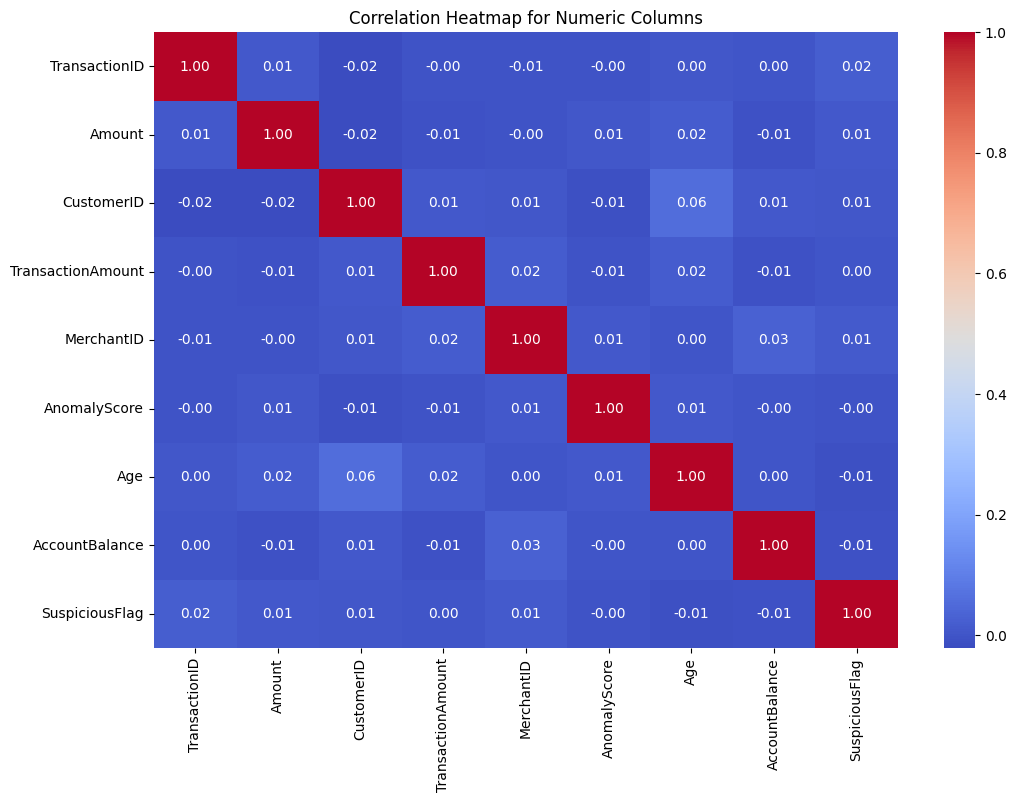

In [ ]:
# lets plot the correlation matrix

# Select only the numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_data.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Numeric Columns')

plt.show()


when you see that the variables are not correlated with each other, you can see that there is no repetition in the variables used: in the first place, there is no reason to delete columns for statistical reasons.

<div style="background-color: #ffc8dd; border-radius: 10px; text-align: center; padding: 20px;">
    <h1 style="color: black;">data cleaning</h1>
</div>


In [ ]:
# spot duplicates and missing values
duplicates = data.duplicated(keep=False)  # 'keep=False' flag all duplicates as True
print("Duplications détectées:")
print(data[duplicates])

missing_values = data.isnull().sum()
print("\nValeurs manquantes par colonne:")
print(missing_values)

Duplications détectées:
      TransactionID     Amount  CustomerID  TransactionAmount   
4               5.0  55.967586      5538.0          50.184070  \
5               5.0  55.967586      5538.0          50.184070   
145           104.0  44.965426      7622.0          58.768931   
146           104.0  44.965426      7622.0          58.768931   
224           166.0  45.438508      7936.0          16.432814   
...             ...        ...         ...                ...   
5765         7348.0  72.394379      3119.0          83.982030   
5810         7462.0  28.311512      2690.0          21.215843   
5811         7462.0  28.311512      2690.0          21.215843   
5984         7965.0  78.975285      3863.0          22.725706   
5985         7965.0  78.975285      3863.0          22.725706   

                Timestamp  MerchantID  AnomalyScore Category           Name   
4     2022-01-01 04:00:00         NaN      0.967909     Food  Customer 5538  \
5     2022-01-01 04:00:00         NaN

In [ ]:
#delete duplicates

print("numbers of rows before duplicates removal :", data.shape[0])

data = data.drop_duplicates()

print("numbers of rows after duplicates removals :", data.shape[0])


numbers of rows before duplicates removal : 6003
numbers of rows after duplicates removals : 5898


In [ ]:
data.head()

,TransactionID,Amount,CustomerID,TransactionAmount,Timestamp,MerchantID,AnomalyScore,Category,Name,Age,Address,AccountBalance,LastLogin,SuspiciousFlag
0,1.0,24.186595,5124.0,90.269008,2022-01-01 00:00:00,2559.0,0.179908,Retail,Customer 5124,NaN,Address 5124,6169.910841,2033-04-16,0
1,5170.0,25.822972,5124.0,68.711374,2022-08-04 09:00:00,4794.0,0.496737,Other,Customer 5124,NaN,Address 5124,6169.910841,2033-04-16,0
2,3.0,63.878814,6215.0,90.854925,2022-01-01 02:00:00,8014.0,0.003338,Retail,Customer 6215,18.0,Address 6215,2901.465710,2036-04-11,0
3,4470.0,83.802112,6215.0,48.688829,NaN,4540.0,0.114749,Other,Customer 6215,18.0,Address 6215,2901.465710,2036-04-11,0
4,5.0,55.967586,5538.0,50.184070,2022-01-01 04:00:00,NaN,0.967909,Food,Customer 5538,33.0,Address 5538,1929.259245,2034-06-04,0


In [ ]:
# age completion
age_median = data['Age'].median()
data['Age'].fillna(age_median, inplace=True)

# address completion
most_common_address = data['Address'].mode()[0]
data['Address'].fillna(most_common_address, inplace=True)

In [ ]:
# lets delete the rows with missing values

print("number of row before missing values removal :", data.shape[0])

data_cleaned = data.dropna()

# Afficher le nombre de lignes après la suppression des données manquantes
print("number of row after missing values removal :", data_cleaned.shape[0])


number of row before missing values removal : 5898
number of row after missing values removal : 4344


 why we are removing the columns "TransactionID", "Name", and "Address" from the dataset:

TransactionID: This is typically a unique identifier for each transaction and does not carry predictive value for modeling purposes. Including it could add unnecessary complexity without benefiting the model's performance.

Name: Names are used to identify individuals but generally do not provide predictive value in data models, except in very specific scenarios. Names can also raise privacy concerns, especially under data protection regulations like GDPR.

Address: If the "Address" column does not contain real or useful geographic information, it may unnecessarily complicate the dataset. Removing it helps to streamline the data, especially when the addresses are not relevant to the analysis or are placeholders without substantive value.

By dropping these columns, we aim to simplify the dataset and focus on variables that contribute meaningfully to the analysis or predictive modeling, enhancing both efficiency and effectiveness.

In [ ]:
# unsuful columns deletion

print("DataFrame before the columns deletion :")
print(data.head())

columns_to_drop = ['TransactionID', 'Name']
data_cleaned = data.drop(columns=columns_to_drop)

print("\nDataFrame after the columns deletion : :")
print(data_cleaned.head())

DataFrame before the columns deletion :
   TransactionID     Amount  CustomerID  TransactionAmount   
0            1.0  24.186595      5124.0          90.269008  \
1         5170.0  25.822972      5124.0          68.711374   
2            3.0  63.878814      6215.0          90.854925   
3         4470.0  83.802112      6215.0          48.688829   
4            5.0  55.967586      5538.0          50.184070   

             Timestamp  MerchantID  AnomalyScore Category           Name   
0  2022-01-01 00:00:00      2559.0      0.179908   Retail  Customer 5124  \
1  2022-08-04 09:00:00      4794.0      0.496737    Other  Customer 5124   
2  2022-01-01 02:00:00      8014.0      0.003338   Retail  Customer 6215   
3                  NaN      4540.0      0.114749    Other  Customer 6215   
4  2022-01-01 04:00:00         NaN      0.967909     Food  Customer 5538   

    Age       Address  AccountBalance   LastLogin  SuspiciousFlag  
0  41.0  Address 5124     6169.910841  2033-04-16             

In [ ]:
data.columns

Index(['TransactionID', 'Amount', 'CustomerID', 'TransactionAmount',
       'Timestamp', 'MerchantID', 'AnomalyScore', 'Category', 'Name', 'Age',
       'Address', 'AccountBalance', 'LastLogin', 'SuspiciousFlag'],
      dtype='object')

In [ ]:
print(data_cleaned.columns)
print('--------------------------------------------')
print(data_cleaned['SuspiciousFlag'].value_counts(), data_cleaned['Category'].value_counts())

Index(['Amount', 'CustomerID', 'TransactionAmount', 'Timestamp', 'MerchantID',
       'AnomalyScore', 'Category', 'Age', 'Address', 'AccountBalance',
       'LastLogin', 'SuspiciousFlag'],
      dtype='object')
--------------------------------------------
SuspiciousFlag
0    5774
1     124
Name: count, dtype: int64 Category
Online    1228
Retail    1222
Travel    1173
Other     1164
Food      1111
Name: count, dtype: int64


<div style="background-color: #e6cfc6; border-radius: 10px; text-align: center; padding: 20px;">
    <h1 style="color: black;">Feature Engineering</h1>
</div>


time fetures:

In [ ]:
#Converting TimeStamp to datetime format

data_cleaned['Timestamp1'] = pd.to_datetime(data_cleaned['Timestamp'])

print(data_cleaned.dtypes)

data_cleaned['Hour'] = data_cleaned['Timestamp1'].dt.hour
data_cleaned['LastLogin'] = pd.to_datetime(data_cleaned['LastLogin'])
data_cleaned['gap'] = (data_cleaned['Timestamp1'] - data_cleaned['LastLogin']).dt.days.abs()

data_cleaned = data_cleaned.dropna()



Amount                      float64
CustomerID                  float64
TransactionAmount           float64
Timestamp                    object
MerchantID                  float64
AnomalyScore                float64
Category                     object
Age                         float64
Address                      object
AccountBalance              float64
LastLogin                    object
SuspiciousFlag                int64
Timestamp1           datetime64[ns]
dtype: object


In [ ]:
data_cleaned.head()

,Amount,CustomerID,TransactionAmount,Timestamp,MerchantID,AnomalyScore,Category,Age,Address,AccountBalance,LastLogin,SuspiciousFlag,Timestamp1,Hour,gap
0,24.186595,5124.0,90.269008,2022-01-01 00:00:00,2559.0,0.179908,Retail,41.0,Address 5124,6169.910841,2033-04-16,0,2022-01-01 00:00:00,0.0,4123.0
1,25.822972,5124.0,68.711374,2022-08-04 09:00:00,4794.0,0.496737,Other,41.0,Address 5124,6169.910841,2033-04-16,0,2022-08-04 09:00:00,9.0,3908.0
2,63.878814,6215.0,90.854925,2022-01-01 02:00:00,8014.0,0.003338,Retail,18.0,Address 6215,2901.465710,2036-04-11,0,2022-01-01 02:00:00,2.0,5214.0
6,26.543893,5538.0,61.090459,2022-06-04 22:00:00,8026.0,0.244508,Online,33.0,Address 5538,1929.259245,2034-06-04,0,2022-06-04 22:00:00,22.0,4383.0
7,94.939286,6022.0,22.252736,2022-01-01 05:00:00,3314.0,0.614682,Food,41.0,Address 6022,3900.584025,2035-10-01,0,2022-01-01 05:00:00,5.0,5021.0


ID features:

In [ ]:
# lets divide the data into two parts: one for training and the other for testing

# select the features and the target
features = data_cleaned.drop(['Timestamp', 'Timestamp1', 'LastLogin', 'Address'], axis=1)
target = pd.read_csv("label.csv")

features['FraudIndicator'] = target


# Divide the data into training and testing sets: 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [ ]:
# calcul of the mean of the target variable for each category: mean encoding
merchant_means = X_train.groupby('MerchantID')['FraudIndicator'].mean()
category_means = X_train.groupby('Category')['FraudIndicator'].mean()
customer_means = X_train.groupby('CustomerID')['FraudIndicator'].mean()

# Application of the mapping
X_train['MerchantID'] = X_train['MerchantID'].map(merchant_means)
X_train['Category'] = X_train['Category'].map(category_means)
X_train['CustomerID'] = X_train['CustomerID'].map(customer_means)

X_test['MerchantID'] = X_test['MerchantID'].map(merchant_means)
X_test['Category'] = X_test['Category'].map(category_means)
X_test['CustomerID'] = X_test['CustomerID'].map(customer_means)

X_train['MerchantID'].fillna(0, inplace=True)
X_train['Category'].fillna(0, inplace=True)
X_train['CustomerID'].fillna(0, inplace=True)

X_test['MerchantID'].fillna(0, inplace=True)
X_test['Category'].fillna(0, inplace=True)
X_test['CustomerID'].fillna(0, inplace=True)

X_train = X_train.drop(['FraudIndicator'], axis=1)
X_test = X_test.drop(['FraudIndicator'], axis=1)


In [ ]:
X_train.head(), X_test.head(), y_train.head(), y_test.head()

(         Amount  CustomerID  TransactionAmount  MerchantID  AnomalyScore   
 4301  75.479056         0.0          90.654385         0.0      0.389806  \
 5872  58.156905         0.0          79.291463         0.0      0.481948   
 2229  27.800886         0.0          57.510998         0.0      0.931111   
 5187  40.092002         0.0          47.575444         0.0      0.111036   
 3604  17.980115         0.5          22.375237         1.0      0.841261   
 
       Category   Age  AccountBalance  SuspiciousFlag  Hour     gap  
 4301  0.102888  47.0     6216.592207               0   5.0  1556.0  
 5872  0.066787  45.0     1706.693746               0  22.0  1308.0  
 2229  0.091873  41.0     5274.509580               0  16.0  6977.0  
 5187  0.102459  23.0     2264.532241               0   3.0  5464.0  
 3604  0.091873  23.0     6706.515318               0   3.0  3354.0  ,
            Amount  CustomerID  TransactionAmount  MerchantID  AnomalyScore   
 4102    57.138777         0.0      

In [ ]:
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

<div style="background-color: #ccd5ae; border-radius: 10px; text-align: center; padding: 20px;">
    <h1 style="color: black;">Data Modelling</h1>
</div>


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3384, 11), (1451, 11), (3384, 1), (1451, 1))

Best hyperparameter C found: 0.14873521072935117
Performance on the training set:
  Precision: 0.2781
  Recall: 0.7143
  F1 Score: 0.4003
  Accuracy: 0.7875

Performance on the test set:
  Precision: 0.2853
  Recall: 0.7203
  F1 Score: 0.4087
  Accuracy: 0.7946



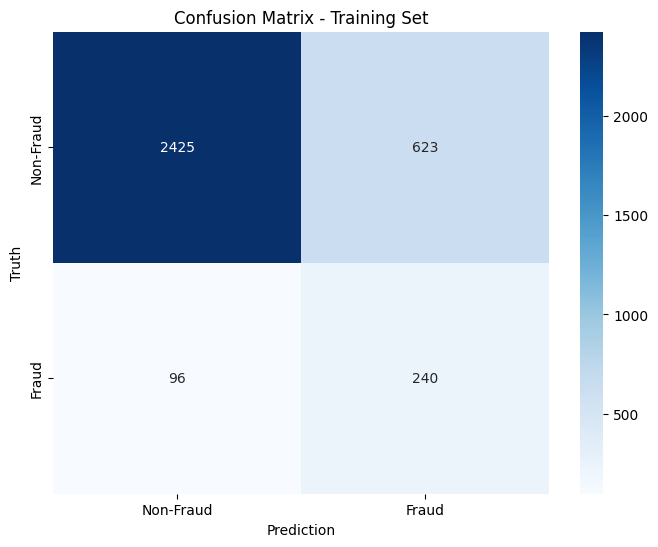

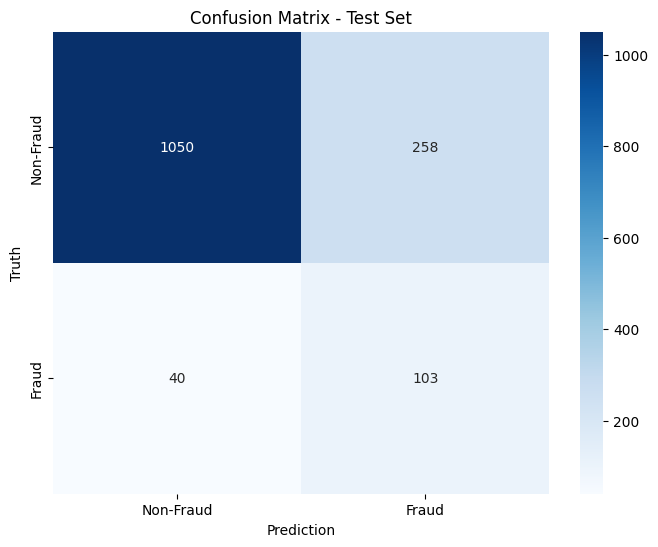

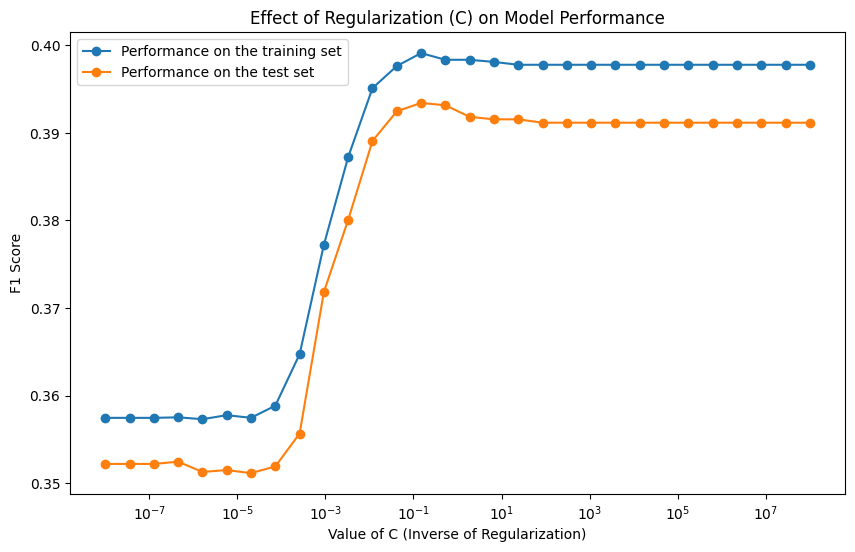

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define logistic regression with class weighting
log_reg = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42, class_weight='balanced')

# Hyperparameter 'C' to optimize (inverse of regularization strength)
param_grid = {'C': np.logspace(-8, 8, 30)}  # explore different values of C

# Use GridSearchCV to find the best hyperparameter C
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='f1', return_train_score=True)
grid_search.fit(X_train_scaled, y_train)

# Best model after optimization
best_log_reg = grid_search.best_estimator_

# Display the best hyperparameter C
print(f"Best hyperparameter C found: {grid_search.best_params_['C']}")

# Predictions on the training and test sets
y_train_pred = best_log_reg.predict(X_train_scaled)
y_test_pred = best_log_reg.predict(X_test_scaled)

# Calculate performance metrics
def print_metrics(y_true, y_pred, dataset_type):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Performance on {dataset_type}:")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print(f"  Accuracy: {accuracy:.4f}\n")

print_metrics(y_train, y_train_pred, "the training set")
print_metrics(y_test, y_test_pred, "the test set")

# Display the confusion matrix for the training set
conf_matrix = confusion_matrix(y_train, y_train_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix - Training Set')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show()

# Display the confusion matrix for the test set
conf_matrix = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show()

# Visualize the effect of the hyperparameter C on overfitting
train_scores = grid_search.cv_results_['mean_train_score']
test_scores = grid_search.cv_results_['mean_test_score']
param_values = grid_search.cv_results_['param_C']

plt.figure(figsize=(10, 6))
plt.plot(param_values, train_scores, label='Performance on the training set', marker='o')
plt.plot(param_values, test_scores, label='Performance on the test set', marker='o')
plt.xscale('log')
plt.xlabel('Value of C (Inverse of Regularization)')
plt.ylabel('F1 Score')
plt.title('Effect of Regularization (C) on Model Performance')
plt.legend()
plt.show()


Best max_depth hyperparameter found: 6
Performance on training set:
  Precision: 0.9970
  Recall: 1.0000
  F1 Score: 0.9985
  Accuracy: 0.9997

Performance on test set:
  Precision: 0.9862
  Recall: 1.0000
  F1 Score: 0.9931
  Accuracy: 0.9986



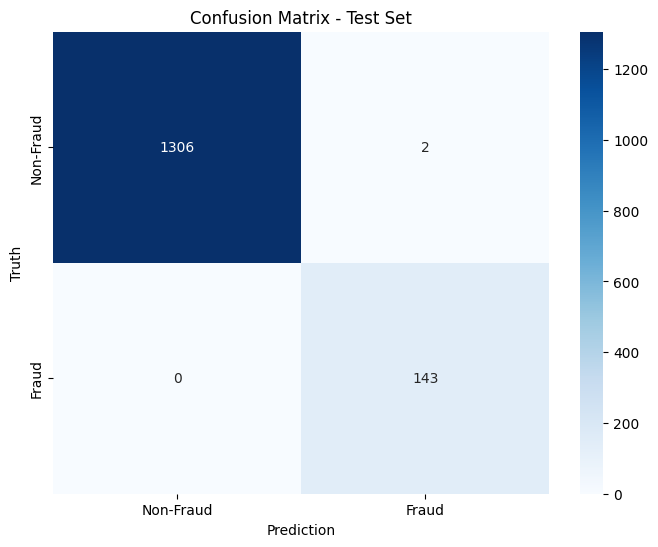

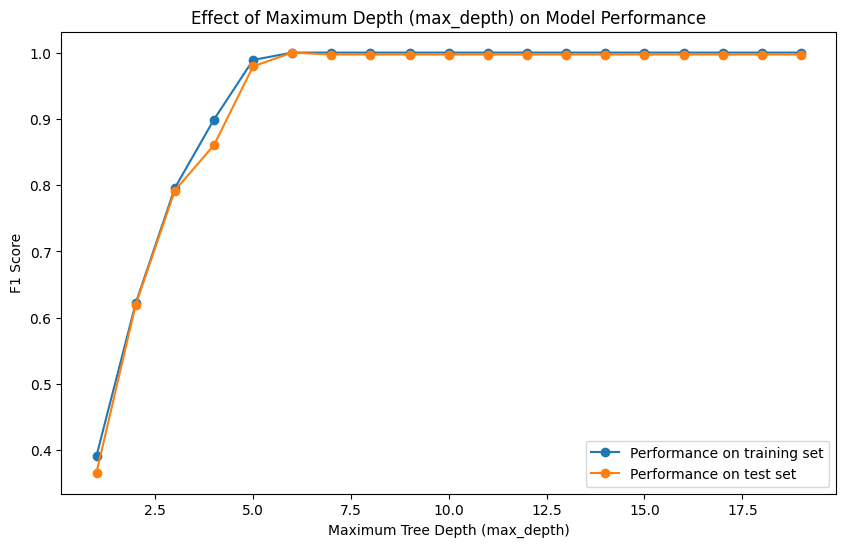

In [32]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data (replace with your own data if necessary)
# Make sure X_train, X_test, y_train, y_test have already been defined and preprocessed as described earlier

# Define the decision tree with handling for imbalanced classes
tree = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# Hyperparameters to optimize (maximum depth of the tree)
param_grid = {'max_depth': range(1, 20)}  # Exploring depths from 1 to 20

# Use GridSearchCV to find the best hyperparameter max_depth
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='recall', return_train_score=True)
grid_search.fit(X_train, y_train)

# Best model after optimization
best_tree = grid_search.best_estimator_

# Display the best max_depth hyperparameter found
print(f"Best max_depth hyperparameter found: {grid_search.best_params_['max_depth']}")

# Predictions on the training and test sets
y_train_pred = best_tree.predict(X_train)
y_test_pred = best_tree.predict(X_test)

# Calculate performance metrics
def print_metrics(y_true, y_pred, dataset_type):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Performance on {dataset_type}:")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print(f"  Accuracy: {accuracy:.4f}\n")

print_metrics(y_train, y_train_pred, "training set")
print_metrics(y_test, y_test_pred, "test set")

# Display the confusion matrix for the test set
conf_matrix = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show()

# Visualize the effect of the max_depth hyperparameter on performance
train_scores = grid_search.cv_results_['mean_train_score']
test_scores = grid_search.cv_results_['mean_test_score']
param_values = list(param_grid['max_depth'])

plt.figure(figsize=(10, 6))
plt.plot(param_values, train_scores, label='Performance on training set', marker='o')
plt.plot(param_values, test_scores, label='Performance on test set', marker='o')
plt.xlabel('Maximum Tree Depth (max_depth)')
plt.ylabel('F1 Score')
plt.title('Effect of Maximum Depth (max_depth) on Model Performance')
plt.legend()
plt.show()

# Visualize the best decision tree
plt.figure(figsize=(20, 10))  # Set figure size for better visibility
plot_tree(best_tree, filled=True, 
          feature_names=X_train.columns,  # Use your feature names
          class_names=['Non-Fraud', 'Fraud'],  # Names of the classes
          rounded=True, fontsize=10)
plt.title('Optimal Decision Tree Visualization')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

# Option 1: Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Option 2: Try Random Forest instead of a single Decision Tree
forest = RandomForestClassifier(random_state=42, class_weight='balanced')
param_grid_forest = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

grid_search_forest = GridSearchCV(forest, param_grid_forest, cv=2, scoring='recall', return_train_score=True)
grid_search_forest.fit(X_train_resampled, y_train_resampled)

# Best model
best_forest = grid_search_forest.best_estimator_
print(f"Meilleurs hyperparamètres: {grid_search_forest.best_params_}")

# Predictions
y_train_pred_forest = best_forest.predict(X_train)
y_test_pred_forest = best_forest.predict(X_test)

# Evaluate
print_metrics(y_train, y_train_pred_forest, "l'ensemble d'entraînement (Random Forest)")
print_metrics(y_test, y_test_pred_forest, "l'ensemble de test (Random Forest)")

# Confusion matrix
conf_matrix_forest = confusion_matrix(y_test, y_test_pred_forest)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_forest, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-fraude', 'Fraude'], yticklabels=['Non-fraude', 'Fraude'])
plt.title('Matrice de Confusion - Ensemble de Test (Random Forest)')
plt.xlabel('Prédiction')
plt.ylabel('Vérité')
plt.show()

# Visualize the effect of hyperparameters (Random Forest)
train_scores_forest = grid_search_forest.cv_results_['mean_train_score']
test_scores_forest = grid_search_forest.cv_results_['mean_test_score']
param_values_forest = [str(x) for x in grid_search_forest.cv_results_['params']]

plt.figure(figsize=(10, 6))
plt.plot(param_values_forest, train_scores_forest, label='Performance sur l\'ensemble d\'entraînement', marker='o')
plt.plot(param_values_forest, test_scores_forest, label='Performance sur l\'ensemble de test', marker='o')
plt.xlabel('Hyperparamètres du modèle')
plt.ylabel('Recall Score')
plt.title('Effet des hyperparamètres sur la performance du modèle (Random Forest)')
plt.xticks(rotation=90)
plt.legend()
plt.show()
